# Project Overview
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in and Check Data

In [22]:
customers = pd.read_csv("Ecommerce Customers")

In [23]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [24]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Using this Data I will create plots to help us analyse what is happening 

In [30]:
sns.set_palette("mako")
sns.set_style('darkgrid')

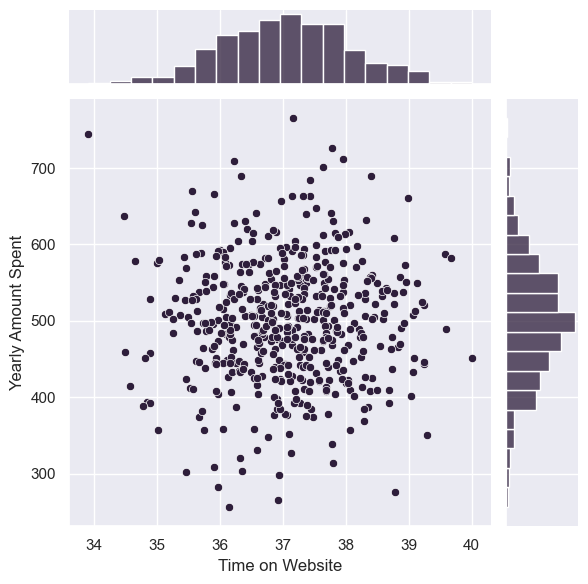

In [31]:
# Time on Website vs Yearly Amount Spent
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

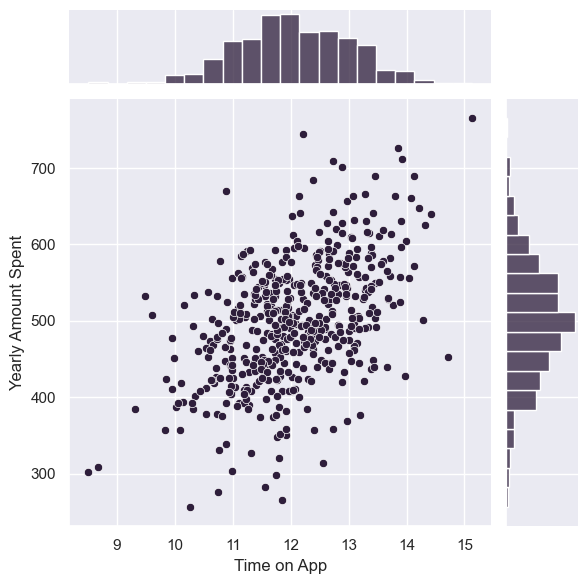

In [32]:
# Time on App vs Yearly Amount Spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

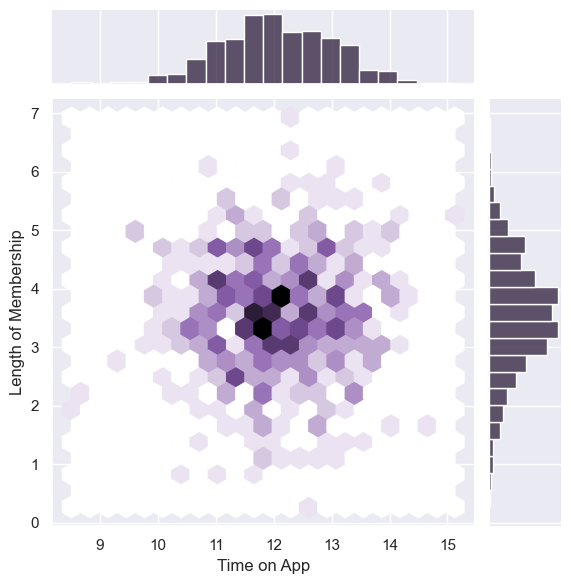

In [33]:
# Time on App vs Length of Membership.
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

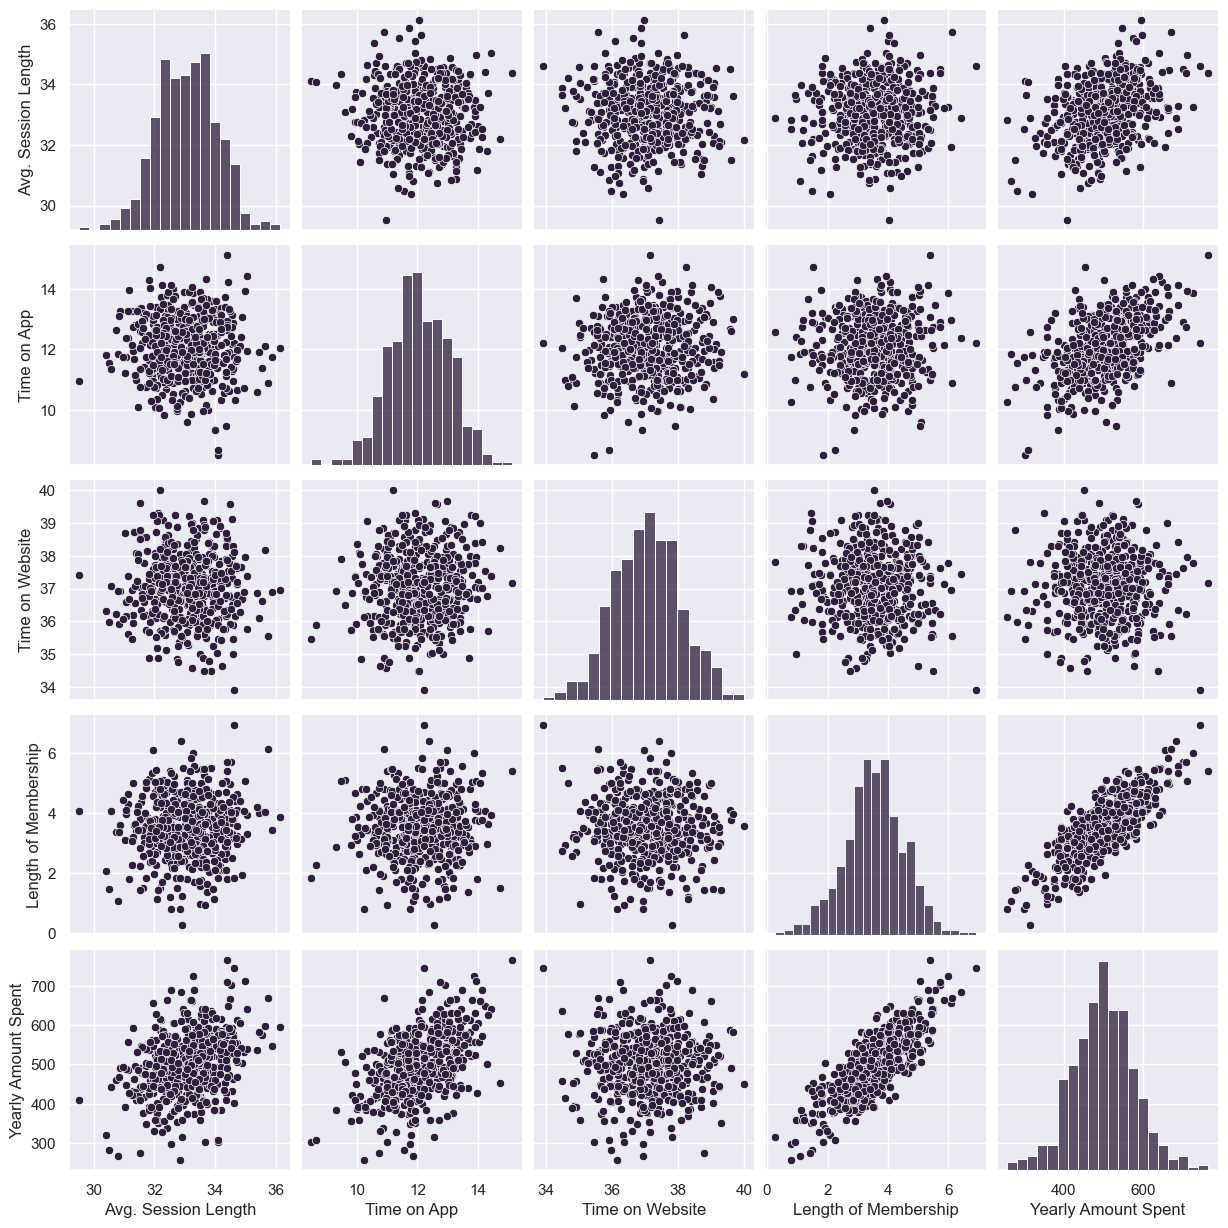

In [34]:
# Relationships across the entire data set
sns.pairplot(customers)

In [35]:
# The Most Correlated feature of this data set with the Yearly Amount Spent is the Length of Membership

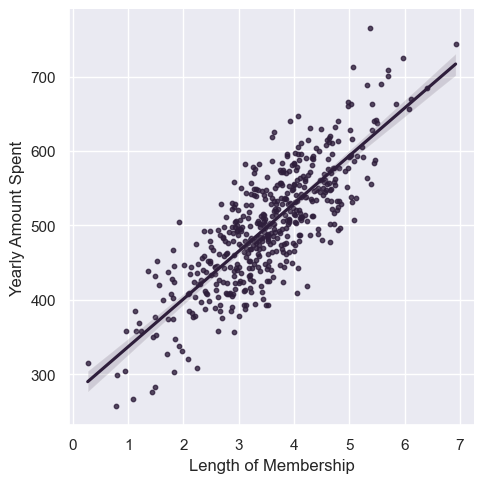

In [41]:
# Linear model plo of Yearly Amount Spent vs. Length of Membership.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers, scatter_kws={"s": 10})

In [42]:
# Now the data has been explored, it is time to create a Training and Testing Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
# Training the Model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [50]:
# Predicting Test Data
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

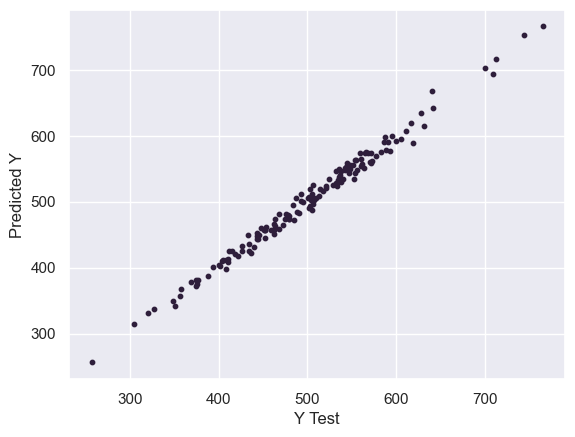

In [53]:
# Real test values vs predicted values
plt.scatter(y_test,predictions, s=10)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [55]:
#Evaluating the Model
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE): 7.228148653430832
Mean Squared Error (MSE): 79.8130516509745
Root Mean Squared Error (RMSE): 8.933815066978637


C:\Users\ihassan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

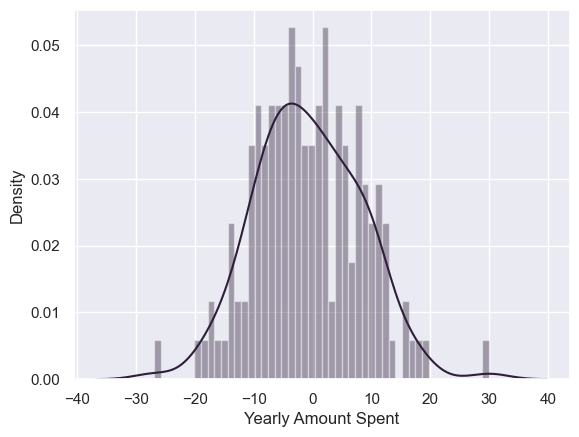

In [58]:
#Exxploring the Residuals to check our data is okay
sns.distplot((y_test-predictions),bins=50)

## Conclusion

In [59]:
# The DataFrame
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

### Solution

The data shows that there is is significantly more sales coming from the Time on App compared to Time on Website which shows that the App footfall seems to have a bigger impact on the sales of the company. 

This data can be acted upon in 2 ways:
 - Focous more on the App knowing there is much more income coming into the company from that sector
 - Investigate the reasons behing why the website isnt getting as many sales and improve the website to accomodate this 
 
Although these seem like simple solutions, futher research will need to be completed in order to understand the reasons behind these results as there will be factors affecting the results.